In [2]:
import pyrealsense2 as rs
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as R
import copy

In [3]:
np.set_printoptions(precision=4, suppress=True)

# Saving all frames 

In [4]:
# data filenames
d435_filename = 'data/D435.bag'
t265_filename = 'data/T265.bag'

### T265

In [36]:
# Setup:
cfg = rs.config()
cfg.enable_device_from_file(t265_filename)
cfg.enable_stream(rs.stream.pose)
pipe = rs.pipeline()
profile = pipe.start(cfg)

t265_data_list = []
t265_time_list = []
first_timestamp = None
while(True):

    frames = pipe.wait_for_frames()
    pose = frames.get_pose_frame()
    
    if pose:
        if pose.get_timestamp() == first_timestamp:
            print('reached the first frame - reading bag file completed')
            break
        if first_timestamp is None:
            first_timestamp = pose.get_timestamp()
            print('first_timestamp',first_timestamp)
            print('first transformation:\n',get_transformation(pose.get_pose_data()))
        print('current-first',pose.get_timestamp()-first_timestamp)
        t265_data_list.append(pose.get_pose_data())
        t265_time_list.append(pose.get_timestamp())

pipe.stop()

first_timestamp 1585059273045.0635
[[ 0.9999 -0.0099 -0.0012  0.    ]
 [ 0.01    0.9998  0.018   0.    ]
 [ 0.001  -0.018   0.9998  0.    ]
 [ 0.      0.      0.      1.    ]]
current-first 0.0
current-first 209.966064453125
current-first 214.96484375
current-first 219.964111328125
current-first 224.963134765625
current-first 229.9619140625
current-first 234.962158203125
current-first 239.9609375
current-first 244.9599609375
current-first 249.959228515625
current-first 254.9580078125
current-first 259.95703125
current-first 264.95703125
current-first 269.9560546875
current-first 274.954833984375
current-first 279.9541015625
current-first 284.953125
current-first 289.951904296875
current-first 294.9521484375
current-first 299.951171875
current-first 304.949951171875
current-first 309.94921875
current-first 314.947998046875
current-first 319.947021484375
current-first 324.947265625
current-first 329.946044921875
current-first 334.945068359375
current-first 339.944091796875
current-first 

current-first 1654.77197265625
current-first 1659.770751953125
current-first 1664.770751953125
current-first 1669.769775390625
current-first 1674.768798828125
current-first 1679.767822265625
current-first 1684.7666015625
current-first 1689.765869140625
current-first 1694.765869140625
current-first 1699.7646484375
current-first 1704.763916015625
current-first 1709.7626953125
current-first 1714.76171875
current-first 1719.761962890625
current-first 1724.7607421875
current-first 1729.759765625
current-first 1734.7587890625
current-first 1739.7578125
current-first 1744.7578125
current-first 1749.7568359375
current-first 1754.755859375
current-first 1759.754638671875
current-first 1764.75390625
current-first 1769.752685546875
current-first 1774.752685546875
current-first 1779.751953125
current-first 1784.750732421875
current-first 1789.749755859375
current-first 1794.748779296875
current-first 1799.748779296875
current-first 1804.747802734375
current-first 1809.746826171875
current-first 18

current-first 3089.53076171875
current-first 3094.52978515625
current-first 3099.530029296875
current-first 3104.52880859375
current-first 3109.52783203125
current-first 3114.52685546875
current-first 3119.52587890625
current-first 3124.52587890625
current-first 3129.52490234375
current-first 3134.52392578125
current-first 3139.522705078125
current-first 3144.52197265625
current-first 3149.52197265625
current-first 3154.520751953125
current-first 3159.52001953125
current-first 3164.518798828125
current-first 3169.517822265625
current-first 3174.516845703125
current-first 3179.516845703125
current-first 3184.515869140625
current-first 3189.514892578125
current-first 3194.513916015625
current-first 3199.5126953125
current-first 3204.512939453125
current-first 3209.511962890625
current-first 3214.5107421875
current-first 3219.510009765625
current-first 3224.5087890625
current-first 3229.5087890625
current-first 3234.508056640625
current-first 3239.5068359375
current-first 3244.505859375
c

current-first 4524.46435546875
current-first 4529.46337890625
current-first 4534.46240234375
current-first 4539.461669921875
current-first 4544.46044921875
current-first 4549.46044921875
current-first 4554.459228515625
current-first 4559.45849609375
current-first 4564.45751953125
current-first 4569.456298828125
current-first 4574.45654296875
current-first 4579.455322265625
current-first 4584.454345703125
current-first 4589.45361328125
current-first 4594.452392578125
current-first 4599.452392578125
current-first 4604.451416015625
current-first 4609.450439453125
current-first 4614.449462890625
current-first 4619.448486328125
current-first 4624.448486328125
current-first 4629.447265625
current-first 4634.446533203125
current-first 4639.445556640625
current-first 4644.4443359375
current-first 4649.444580078125
current-first 4654.443359375
current-first 4659.4423828125
current-first 4664.441650390625
current-first 4669.4404296875
current-first 4674.439453125
current-first 4679.439453125
cur

current-first 5964.097412109375
current-first 5969.097412109375
current-first 5974.0966796875
current-first 5979.095458984375
current-first 5984.06640625
current-first 5989.0654296875
current-first 5994.0654296875
current-first 5999.064208984375
current-first 6004.0634765625
current-first 6009.062255859375
current-first 6014.062255859375
current-first 6019.0615234375
current-first 6024.060302734375
current-first 6029.059326171875
current-first 6034.058349609375
current-first 6039.058349609375
current-first 6044.057373046875
current-first 6049.056396484375
current-first 6054.055419921875
current-first 6059.05419921875
current-first 6064.053466796875
current-first 6069.053466796875
current-first 6074.05224609375
current-first 6079.051513671875
current-first 6084.05029296875
current-first 6089.04931640625
current-first 6094.049560546875
current-first 6099.04833984375
current-first 6104.04736328125
current-first 6109.04638671875
current-first 6114.04638671875
current-first 6119.04541015625

current-first 7408.888427734375
current-first 7413.887451171875
current-first 7418.88671875
current-first 7423.885498046875
current-first 7428.885498046875
current-first 7433.884521484375
current-first 7438.883544921875
current-first 7443.88232421875
current-first 7448.882568359375
current-first 7453.881591796875
current-first 7458.88037109375
current-first 7463.879638671875
current-first 7468.87841796875
current-first 7473.87744140625
current-first 7478.877685546875
current-first 7483.87646484375
current-first 7488.874267578125
current-first 7493.873291015625
current-first 7498.873291015625
current-first 7503.872314453125
current-first 7508.871337890625
current-first 7513.870361328125
current-first 7518.869140625
current-first 7523.869384765625
current-first 7528.868408203125
current-first 7533.8671875
current-first 7538.866455078125
current-first 7543.865234375
current-first 7548.865234375
current-first 7553.8642578125
current-first 7558.86328125
current-first 7563.8623046875
current

current-first 8838.712890625
current-first 8843.712646484375
current-first 8848.7119140625
current-first 8853.710693359375
current-first 8858.709716796875
current-first 8863.709716796875
current-first 8868.708740234375
current-first 8873.707763671875
current-first 8878.706787109375
current-first 8883.705810546875
current-first 8893.70458984375
current-first 8898.703857421875
current-first 8903.70263671875
current-first 8908.70263671875
current-first 8913.701904296875
current-first 8918.70068359375
current-first 8923.69970703125
current-first 8928.69873046875
current-first 8933.69775390625
current-first 8938.69775390625
current-first 8943.69677734375
current-first 8948.69580078125
current-first 8953.694580078125
current-first 8958.69482421875
current-first 8963.69384765625
current-first 8968.692626953125
current-first 8973.69189453125
current-first 8978.690673828125
current-first 8983.690673828125
current-first 8988.68994140625
current-first 8993.619873046875
current-first 8998.61889648

current-first 10278.41650390625
current-first 10283.415771484375
current-first 10288.41455078125
current-first 10293.41455078125
current-first 10298.413818359375
current-first 10303.41259765625
current-first 10308.41162109375
current-first 10313.41064453125
current-first 10318.40966796875
current-first 10323.40966796875
current-first 10328.408447265625
current-first 10333.40771484375
current-first 10338.406494140625
current-first 10343.406494140625
current-first 10348.40576171875
current-first 10353.404541015625
current-first 10358.403564453125
current-first 10363.402587890625
current-first 10368.402587890625
current-first 10373.401611328125
current-first 10378.400634765625
current-first 10383.399658203125
current-first 10388.399658203125
current-first 10393.398681640625
current-first 10398.397705078125
current-first 10403.396484375
current-first 10408.395751953125
current-first 10413.395751953125
current-first 10418.39453125
current-first 10423.393798828125
current-first 10428.3925781

current-first 11708.25732421875
current-first 11713.256103515625
current-first 11718.25537109375
current-first 11723.254150390625
current-first 11728.253173828125
current-first 11733.253173828125
current-first 11738.252197265625
current-first 11743.251220703125
current-first 11748.25
current-first 11753.249267578125
current-first 11758.249267578125
current-first 11763.248046875
current-first 11768.247314453125
current-first 11773.24609375
current-first 11778.2451171875
current-first 11783.245361328125
current-first 11788.244140625
current-first 11793.2431640625
current-first 11798.2421875
current-first 11803.2421875
current-first 11808.2412109375
current-first 11813.240234375
current-first 11818.2392578125
current-first 11823.238037109375
current-first 11828.23828125
current-first 11833.2373046875
current-first 11838.236083984375
current-first 11843.2353515625
current-first 11848.234130859375
current-first 11853.234130859375
current-first 11858.2333984375
current-first 11863.2321777343

current-first 13143.039794921875
current-first 13148.03857421875
current-first 13153.03857421875
current-first 13158.03759765625
current-first 13163.03662109375
current-first 13168.03564453125
current-first 13173.03564453125
current-first 13178.03466796875
current-first 13183.033447265625
current-first 13188.03271484375
current-first 13193.03271484375
current-first 13198.031494140625
current-first 13203.03076171875
current-first 13208.029541015625
current-first 13213.028564453125
current-first 13218.02880859375
current-first 13223.027587890625
current-first 13228.026611328125
current-first 13233.025634765625
current-first 13238.024658203125
current-first 13243.024658203125
current-first 13248.023681640625
current-first 13253.022705078125
current-first 13258.021484375
current-first 13263.021484375
current-first 13268.020751953125
current-first 13273.01953125
current-first 13278.0185546875
current-first 13283.017578125
current-first 13288.017578125
current-first 13293.0166015625
current-

current-first 14587.888916015625
current-first 14592.8876953125
current-first 14597.886962890625
current-first 14602.8857421875
current-first 14607.884765625
current-first 14612.885009765625
current-first 14617.8837890625
current-first 14622.8828125
current-first 14627.8818359375
current-first 14632.880859375
current-first 14637.880859375
current-first 14642.8798828125
current-first 14647.87890625
current-first 14652.877685546875
current-first 14657.876953125
current-first 14662.876953125
current-first 14667.875732421875
current-first 14672.875
current-first 14677.873779296875
current-first 14682.873779296875
current-first 14687.873046875
current-first 14692.871826171875
current-first 14697.870849609375
current-first 14702.869873046875
current-first 14707.869873046875
current-first 14712.868896484375
current-first 14717.867919921875
current-first 14722.866943359375
current-first 14727.866943359375
current-first 14732.86572265625
current-first 14737.864990234375
current-first 14742.8637

current-first 16027.647216796875
current-first 16032.646240234375
current-first 16037.646240234375
current-first 16042.645263671875
current-first 16047.64404296875
current-first 16052.643310546875
current-first 16057.64208984375
current-first 16062.64208984375
current-first 16067.641357421875
current-first 16072.64013671875
current-first 16077.63916015625
current-first 16082.63818359375
current-first 16087.63818359375
current-first 16092.63720703125
current-first 16097.63623046875
current-first 16102.63525390625
current-first 16107.63525390625
current-first 16112.63427734375
current-first 16117.63330078125
current-first 16122.632080078125
current-first 16127.63134765625
current-first 16132.63134765625
current-first 16137.630126953125
current-first 16142.62939453125
current-first 16147.628173828125
current-first 16152.628173828125
current-first 16157.62744140625
current-first 16162.626220703125
current-first 16167.625244140625
current-first 16172.625
current-first 16177.624267578125
cur

current-first 17462.427734375
current-first 17467.4267578125
current-first 17472.4267578125
current-first 17477.42578125
current-first 17482.4248046875
current-first 17487.423583984375
current-first 17492.423828125
current-first 17497.4228515625
current-first 17502.421630859375
current-first 17507.4208984375
current-first 17512.419677734375
current-first 17517.40087890625
current-first 17522.39990234375
current-first 17527.39892578125
current-first 17532.397705078125
current-first 17537.39794921875
current-first 17542.39697265625
current-first 17547.395751953125
current-first 17552.39501953125
current-first 17557.394775390625
current-first 17562.393798828125
current-first 17567.39306640625
current-first 17572.391845703125
current-first 17577.390869140625
current-first 17582.390869140625
current-first 17587.389892578125
current-first 17592.388916015625
current-first 17597.387939453125
current-first 17602.386962890625
current-first 17607.38671875
current-first 17612.385986328125
current-

current-first 18922.207275390625
current-first 18927.2060546875
current-first 18932.206298828125
current-first 18937.205078125
current-first 18942.2041015625
current-first 18947.203369140625
current-first 18952.2021484375
current-first 18957.2021484375
current-first 18962.201171875
current-first 18967.2001953125
current-first 18972.19921875
current-first 18977.19921875
current-first 18982.1982421875
current-first 18987.197021484375
current-first 18992.1962890625
current-first 18997.1953125
current-first 19002.195068359375
current-first 19007.1943359375
current-first 19012.193115234375
current-first 19017.192138671875
current-first 19022.166015625
current-first 19027.1650390625
current-first 19032.1640625
current-first 19037.162841796875
current-first 19042.162109375
current-first 19047.162109375
current-first 19052.160888671875
current-first 19057.16015625
current-first 19062.158935546875
current-first 19067.158935546875
current-first 19072.158203125
current-first 19077.156982421875
cu

current-first 20362.0234375
current-first 20367.022216796875
current-first 20372.021484375
current-first 20377.020263671875
current-first 20382.020263671875
current-first 20387.019287109375
current-first 20392.018310546875
current-first 20397.017333984375
current-first 20402.017333984375
current-first 20407.016357421875
current-first 20412.015380859375
current-first 20417.01416015625
current-first 20422.013427734375
current-first 20427.013427734375
current-first 20432.01220703125
current-first 20437.011474609375
current-first 20442.01123046875
current-first 20447.01025390625
current-first 20452.009521484375
current-first 20457.00830078125
current-first 20462.00732421875
current-first 20467.00732421875
current-first 20472.00634765625
current-first 20477.00537109375
current-first 20482.00439453125
current-first 20487.00341796875
current-first 20492.003173828125
current-first 20497.00244140625
current-first 20502.00146484375
current-first 20507.001220703125
current-first 20512.00024414062

current-first 21801.787109375
current-first 21806.785888671875
current-first 21811.785888671875
current-first 21816.78515625
current-first 21821.783935546875
current-first 21826.782958984375
current-first 21831.781982421875
current-first 21836.781982421875
current-first 21841.781005859375
current-first 21846.780029296875
current-first 21851.779052734375
current-first 21856.779052734375
current-first 21861.778076171875
current-first 21866.777099609375
current-first 21871.77587890625
current-first 21876.775146484375
current-first 21881.775146484375
current-first 21891.77294921875
current-first 21896.77294921875
current-first 21901.77197265625
current-first 21906.77099609375
current-first 21911.77001953125
current-first 21916.76904296875
current-first 21921.768798828125
current-first 21926.76806640625
current-first 21931.76708984375
current-first 21936.765869140625
current-first 21941.76513671875
current-first 21946.764892578125
current-first 21951.763916015625
current-first 21956.7631835

current-first 23236.61865234375
current-first 23241.61767578125
current-first 23246.61669921875
current-first 23251.61669921875
current-first 23256.61572265625
current-first 23261.61474609375
current-first 23266.61376953125
current-first 23271.612548828125
current-first 23276.61279296875
current-first 23281.61181640625
current-first 23286.610595703125
current-first 23291.60986328125
current-first 23296.609619140625
current-first 23301.608642578125
current-first 23306.60791015625
current-first 23311.606689453125
current-first 23316.605712890625
current-first 23321.60595703125
current-first 23326.604736328125
current-first 23331.603759765625
current-first 23336.602783203125
current-first 23341.602783203125
current-first 23346.6015625
current-first 23351.6005859375
current-first 23356.599853515625
current-first 23361.599609375
current-first 23366.5986328125
current-first 23371.59765625
current-first 23376.5966796875
current-first 23381.595703125
current-first 23386.595703125
current-first

current-first 24676.38134765625
current-first 24681.38037109375
current-first 24686.380126953125
current-first 24691.37939453125
current-first 24696.37841796875
current-first 24701.377197265625
current-first 24706.37744140625
current-first 24711.376220703125
current-first 24716.375244140625
current-first 24721.37451171875
current-first 24726.373291015625
current-first 24731.373291015625
current-first 24736.372314453125
current-first 24741.371337890625
current-first 24746.370361328125
current-first 24751.370361328125
current-first 24756.369384765625
current-first 24761.3681640625
current-first 24766.367431640625
current-first 24771.367431640625
current-first 24776.3662109375
current-first 24781.365478515625
current-first 24786.3642578125
current-first 24791.3642578125
current-first 24796.36328125
current-first 24801.3623046875
current-first 24806.361328125
current-first 24811.361328125
current-first 24816.3603515625
current-first 24821.359375
current-first 24826.358154296875
current-fir

current-first 26106.19970703125
current-first 26111.19873046875
current-first 26116.197509765625
current-first 26121.19775390625
current-first 26126.19677734375
current-first 26131.195556640625
current-first 26136.19482421875
current-first 26141.193603515625
current-first 26146.193603515625
current-first 26151.19287109375
current-first 26156.191650390625
current-first 26161.190673828125
current-first 26166.190673828125
current-first 26171.189697265625
current-first 26176.188720703125
current-first 26181.187744140625
current-first 26186.187744140625
current-first 26191.1865234375
current-first 26196.185791015625
current-first 26201.184814453125
current-first 26206.1845703125
current-first 26211.18359375
current-first 26216.1826171875
current-first 26221.181640625
current-first 26226.181640625
current-first 26231.1806640625
current-first 26236.1796875
current-first 26241.178466796875
current-first 26246.177734375
current-first 26251.177734375
current-first 26256.176513671875
current-firs

current-first 27540.955810546875
current-first 27545.955810546875
current-first 27550.954833984375
current-first 27556.002197265625
current-first 27561.001220703125
current-first 27566.000244140625
current-first 27571.000244140625
current-first 27575.999267578125
current-first 27580.998291015625
current-first 27585.997314453125
current-first 27590.997314453125
current-first 27595.99609375
current-first 27600.995361328125
current-first 27605.994140625
current-first 27610.994140625
current-first 27615.993408203125
current-first 27620.9921875
current-first 27625.9912109375
current-first 27630.990234375
current-first 27635.990234375
current-first 27640.989013671875
current-first 27645.98828125
current-first 27650.9873046875
current-first 27655.986083984375
current-first 27660.986328125
current-first 27665.985107421875
current-first 27670.984130859375
current-first 27675.9833984375
current-first 27680.983154296875
current-first 27685.982177734375
current-first 27690.9814453125
current-first

current-first 28975.6962890625
current-first 28980.6953125
current-first 28985.6943359375
current-first 28990.6943359375
current-first 28995.693359375
current-first 29000.6923828125
current-first 29005.69140625
current-first 29010.691162109375
current-first 29015.6904296875
current-first 29020.689453125
current-first 29025.688232421875
current-first 29030.6884765625
current-first 29035.687255859375
current-first 29040.686279296875
current-first 29045.685546875
current-first 29050.685302734375
current-first 29055.684326171875
current-first 29060.771728515625
current-first 29065.770751953125
current-first 29070.76953125
current-first 29075.769775390625
current-first 29080.768798828125
current-first 29085.767578125
current-first 29090.767578125
current-first 29095.766845703125
current-first 29100.765625
current-first 29105.764892578125
current-first 29110.763671875
current-first 29115.763671875
current-first 29120.762451171875
current-first 29125.76171875
current-first 29130.7607421875
cu

current-first 30415.56201171875
current-first 30420.561767578125
current-first 30425.560791015625
current-first 30430.56005859375
current-first 30435.558837890625
current-first 30440.558837890625
current-first 30445.557861328125
current-first 30450.556884765625
current-first 30455.555908203125
current-first 30460.555908203125
current-first 30465.554931640625
current-first 30470.5537109375
current-first 30475.552978515625
current-first 30480.552001953125
current-first 30485.5517578125
current-first 30490.55078125
current-first 30495.5498046875
current-first 30500.5498046875
current-first 30505.548828125
current-first 30510.5478515625
current-first 30515.546875
current-first 30520.545654296875
current-first 30525.5458984375
current-first 30530.544921875
current-first 30535.543701171875
current-first 30540.54296875
current-first 30545.54296875
current-first 30550.541748046875
current-first 30555.541015625
current-first 30560.539794921875
current-first 30565.665771484375
current-first 3057

In [6]:
len(t265_time_list)

6104

### D435i

In [7]:
# Setup:
cfg = rs.config()
cfg.enable_device_from_file(d435_filename)
cfg.enable_stream(rs.stream.depth, 848, 480, rs.format.z16, 30)
pipe = rs.pipeline()
profile = pipe.start(cfg)

d435_data_list = []
d435_time_list = []
# a = np.array([])
# l = []
first_timestamp = None
counter = 0
while(True):

    frames = pipe.wait_for_frames()
    depth_frame = frames.get_depth_frame()
#     print('\ndepth_frame.get_timestamp()',depth_frame.get_timestamp())
    
    if depth_frame.get_timestamp() == first_timestamp:
        print('reached the first frame - reading bag file completed')
        print('timestamp',depth_frame.get_timestamp())
        break
    if first_timestamp is None:
        first_timestamp = depth_frame.get_timestamp()
        print('first_timestamp',first_timestamp)
    print('current-first',depth_frame.get_timestamp()-first_timestamp)
    
    
    
    # to do it first go and find timestampsmof key frames
    if depth_frame.get_timestamp() == 1585059293016.778:
        depth_frame1 = depth_frame
    if depth_frame.get_timestamp() == 1585059293549.9937:
        depth_frame2 = depth_frame
    
    
#     depth_image = np.asanyarray(depth_frame.get_data())
#     depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
#     cv2.imshow('D435 Depth Frame', depth_image)
#     cv2.waitKey(1)
    
#     counter+=1
#     if counter%30==0:
#         a = np.hstack((a, depth_frame))
#         l.append(depth_frame)
    
    d435_data_list.append(np.asanyarray(depth_frame.get_data()).copy())
    d435_time_list.append(depth_frame.get_timestamp())

cv2.destroyAllWindows()
pipe.stop()

first_timestamp 1585059272738.613
current-first 0.0
current-first 32.364013671875
current-first 65.6904296875
current-first 98.64453125
current-first 131.9052734375
current-first 165.260009765625
current-first 198.619384765625
current-first 231.972412109375
current-first 265.320556640625
current-first 298.669921875
current-first 332.087646484375
current-first 365.589111328125
current-first 398.846923828125
current-first 432.1474609375
current-first 465.772216796875
current-first 498.96435546875
current-first 532.234375
current-first 565.82763671875
current-first 598.99462890625
current-first 632.35302734375
current-first 665.62646484375
current-first 698.97509765625
current-first 732.40380859375
current-first 765.72802734375
current-first 799.047119140625
current-first 832.42724609375
current-first 865.82275390625
current-first 899.141357421875
current-first 932.950927734375
current-first 966.539306640625
current-first 999.246826171875
current-first 1032.65673828125
current-first 1065.

current-first 8904.041259765625
current-first 8937.414794921875
current-first 8970.74365234375
current-first 9004.131103515625
current-first 9037.5234375
current-first 9070.91943359375
current-first 9104.188720703125
current-first 9137.487548828125
current-first 9170.879638671875
current-first 9204.4130859375
current-first 9237.685546875
current-first 9270.93994140625
current-first 9304.329833984375
current-first 9337.723388671875
current-first 9371.021240234375
current-first 9404.494873046875
current-first 9437.6923828125
current-first 9471.15478515625
current-first 9504.37451171875
current-first 9537.784423828125
current-first 9571.24609375
current-first 9604.480224609375
current-first 9637.7802734375
current-first 9671.228515625
current-first 9704.627197265625
current-first 9737.8681640625
current-first 9771.18310546875
current-first 9804.661376953125
current-first 9838.06982421875
current-first 9871.497802734375
current-first 9904.677734375
current-first 9938.310546875
current-firs

current-first 17542.854248046875
current-first 17576.237548828125
current-first 17609.589111328125
current-first 17643.459716796875
current-first 17676.140380859375
current-first 17709.812744140625
current-first 17742.8505859375
current-first 17776.23046875
current-first 17809.529052734375
current-first 17843.444091796875
current-first 17877.308837890625
current-first 17909.65869140625
current-first 17942.952880859375
current-first 17976.346923828125
current-first 18009.655029296875
current-first 18043.059326171875
current-first 18076.3701171875
current-first 18109.759765625
current-first 18143.07958984375
current-first 18176.479736328125
current-first 18209.75830078125
current-first 18243.130126953125
current-first 18276.477294921875
current-first 18309.884765625
current-first 18343.191162109375
current-first 18376.5869140625
current-first 18410.087158203125
current-first 18443.265625
current-first 18476.666748046875
current-first 18510.0029296875
current-first 18543.320556640625
curr

current-first 26348.10595703125
current-first 26381.679931640625
current-first 26414.8466796875
current-first 26448.45458984375
current-first 26482.20703125
current-first 26514.983154296875
current-first 26548.885498046875
current-first 26581.6240234375
current-first 26615.031982421875
current-first 26648.266845703125
current-first 26681.665771484375
current-first 26714.9208984375
current-first 26748.472412109375
current-first 26781.6201171875
current-first 26815.01953125
current-first 26848.358642578125
current-first 26881.80029296875
current-first 26915.2099609375
current-first 26948.531005859375
current-first 26982.301513671875
current-first 27015.6650390625
current-first 27048.57421875
current-first 27081.874755859375
current-first 27115.19921875
current-first 27149.234619140625
current-first 27181.982666015625
current-first 27215.590576171875
current-first 27248.7890625
current-first 27281.9716796875
current-first 27315.276611328125
current-first 27348.65576171875
current-first 27

In [33]:
len(d435_time_list)

931

# TODO: submit an issue about saving limit of pyrealsense2.pyrealsense2.depth_frame objects

# Define key frames

In [ ]:
number_of_keyframes = 2

### 265 frames

In [8]:
idx1 = int(len(t265_data_list)*0.65)
idx2 = idx1 + 100 # plus 1 sec
#frame 1
t265_frame1_data = t265_data_list[idx1]
t265_frame1_time = t265_time_list[idx1]
#frame 2
t265_frame2_data = t265_data_list[idx2]
t265_frame2_time = t265_time_list[idx2]

### 435 frames

In [9]:
idx1, val1 = min(enumerate(d435_time_list), key=lambda x: abs(x[1]-t265_frame1_time))
t265_frame1_time, idx1, val1

(1585059293017.0825, 608, 1585059293016.778)

In [10]:
idx2, val2 = min(enumerate(d435_time_list), key=lambda x: abs(x[1]-t265_frame2_time))
t265_frame2_time, idx2, val2

(1585059293517.0698, 623, 1585059293516.6475)

In [11]:
#frame 1
d435_frame1_data = d435_data_list[idx1]#depth_frame1
d435_frame1_time = d435_time_list[idx1]
#frame 2
d435_frame2_data = d435_data_list[idx2]# depth_frame2
d435_frame2_time = d435_time_list[idx2]
d435_frame1_time, d435_frame2_time

(1585059293016.778, 1585059293516.6475)

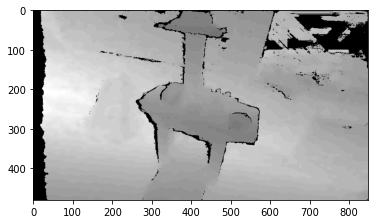

In [12]:
#frame 1
# depth_image = cv2.convertScaleAbs(d435_frame1_data, alpha=0.03)
depth_image = np.asanyarray(depth_frame1.get_data())
depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
plt.imshow(depth_image, cmap='gray')

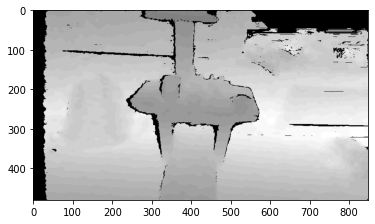

In [13]:
#frame 2
# depth_image = cv2.convertScaleAbs(d435_frame2_data, alpha=0.03)
depth_image = np.asanyarray(depth_frame2.get_data())
depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
plt.imshow(depth_image, cmap='gray')

# Transformations

transformation between cameras

$ {}^{T}T_D$ - d435 wrt t265, always the same

In [14]:
T_d_wrt_t = np.array([[0.999968402, -0.006753626, -0.004188075, -0.015890727],
                      [-0.006685408, -0.999848172, 0.016093893, 0.028273059],
                      [-0.004296131, -0.016065384, -0.999861654, -0.009375589],
                      [0, 0, 0, 1]])

In [15]:
def get_transformation(data):
#     data = pose.get_pose_data()
    data_rot = [float(i.strip('xyzw: ')) for i in str(data.rotation).split(', ')]
    r = R.from_quat(data_rot)
    rotation = np.array(r.as_matrix())
    translation = np.array([float(i.strip('xyzw: ')) for i in str(data.translation).split(', ')])[np.newaxis].T
    T = np.hstack((rotation, translation))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

transformation of t265 wrt world

$ {}^{W}T_{T}$

In [16]:
#frame1
T_t1_wrt_w = get_transformation(t265_frame1_data)
T_t1_wrt_w

array([[ 0.9561, -0.2311,  0.18  , -2.6479],
       [ 0.1028,  0.8402,  0.5325,  0.3917],
       [-0.2743, -0.4906,  0.8271, -0.9613],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

In [17]:
#frame2
T_t2_wrt_w = get_transformation(t265_frame2_data)
T_t2_wrt_w

array([[ 0.9969, -0.069 , -0.0385, -2.827 ],
       [ 0.0785,  0.8075,  0.5847,  0.3955],
       [-0.0092, -0.5859,  0.8103, -0.933 ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

transformation of d435 wrt world

$ {}^{W}T_{D1} = {}^{W}T_{T} {}^{T}T_{D1}$

In [18]:
#frame1
T_d1_wrt_w = T_t1_wrt_w @ T_d_wrt_t
T_d1_wrt_w

array([[ 0.9569,  0.2217, -0.1877, -2.6713],
       [ 0.0949, -0.8493, -0.5193,  0.4088],
       [-0.2746,  0.4791, -0.8337, -0.9785],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

$ {}^{W}T_{D2} = {}^{W}T_{T} {}^{T}T_{D2}$

In [19]:
#frame2
T_d2_wrt_w = T_t2_wrt_w @ T_d_wrt_t
T_d2_wrt_w

array([[ 0.9975,  0.0628,  0.0332, -2.8444],
       [ 0.0705, -0.8173, -0.5719,  0.4116],
       [-0.0088,  0.5728, -0.8196, -0.957 ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

transformation of keyframe2 wrt keyframe1

$ {}^{W}T_{D2} = {}^{W}T_{D1} {}^{D1}T_{D2}$

$ ({}^{W}T_{D1})^{-1} {}^{W}T_{D2} = {}^{D1}T_{D2}$

${}^{D1}T_{D2}$:

In [20]:
# keyframe 2 wtr keyframe 1
T_d2_wrt_d1 = np.linalg.inv(T_d1_wrt_w) @ T_d2_wrt_w
T_d2_wrt_d1

array([[ 0.9636, -0.1747,  0.2026, -0.1712],
       [ 0.157 ,  0.9825,  0.1004, -0.0305],
       [-0.2166, -0.065 ,  0.9741,  0.0131],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

Now let's try to get ${}^{D1}T_{D2}$ from point cloud registration

# Point cloud registration

### Defive PC, init, and max_point_pair_dist

In [21]:
def get_geom_pcl(depth_frame): #slower
    pc = rs.pointcloud()
    points = pc.calculate(depth_frame).as_points()
    coordinates = np.ndarray(buffer=points.get_vertices(), dtype=np.float32, shape=(480, 848, 3)) \
        .reshape((-1, 3))
    coordinates = coordinates[coordinates[:, 2] != 0]
    pcl = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(coordinates))
    return pcl

In [22]:
import copy
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp])

In [23]:
%%time
pcl1 = get_geom_pcl(depth_frame1)
pcl2 = get_geom_pcl(depth_frame2)

CPU times: user 952 ms, sys: 26.5 ms, total: 979 ms
Wall time: 995 ms


In [24]:
init = T_d2_wrt_d1 # does not help much ?

In [25]:
max_point_pair_dist = 0.05

### Evaliate init guess

In [30]:
evaluation_init = o3d.registration.evaluate_registration(pcl2, pcl1,
                                                    max_point_pair_dist, init)
evaluation_init

registration::RegistrationResult with fitness=8.542888e-01, inlier_rmse=1.152913e-02, and correspondence_set size of 313307
Access transformation to get result.

In [34]:
draw_registration_result(pcl2, pcl1, init)

### Evaluate ICP

#### With $init = Identity$

In [31]:
%%time
T = o3d.registration.registration_icp(pcl2, pcl1, max_point_pair_dist)
T, T.transformation

CPU times: user 1min 46s, sys: 8.28 s, total: 1min 54s
Wall time: 35.1 s


(registration::RegistrationResult with fitness=8.315128e-01, inlier_rmse=1.815872e-02, and correspondence_set size of 304954
 Access transformation to get result.,
 array([[ 0.9752, -0.1317,  0.1778, -0.1548],
        [ 0.1266,  0.9912,  0.0397,  0.0025],
        [-0.1815, -0.0162,  0.9833,  0.0231],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [159]:
draw_registration_result(pcl2, pcl1, T.transformation)

#### With $init = {}^{D1}T_{D2}$

In [27]:
%%time
T_init = o3d.registration.registration_icp(pcl2, pcl1, max_point_pair_dist, init)
T_init, T_init.transformation

CPU times: user 56.4 s, sys: 9.24 s, total: 1min 5s
Wall time: 17.9 s


(registration::RegistrationResult with fitness=8.599085e-01, inlier_rmse=1.129772e-02, and correspondence_set size of 315368
 Access transformation to get result.,
 array([[ 0.9632, -0.1794,  0.2002, -0.179 ],
        [ 0.1638,  0.9822,  0.0922, -0.0199],
        [-0.2132, -0.056 ,  0.9754,  0.0127],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [29]:
draw_registration_result(pcl2, pcl1, T_init.transformation)

# Results

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


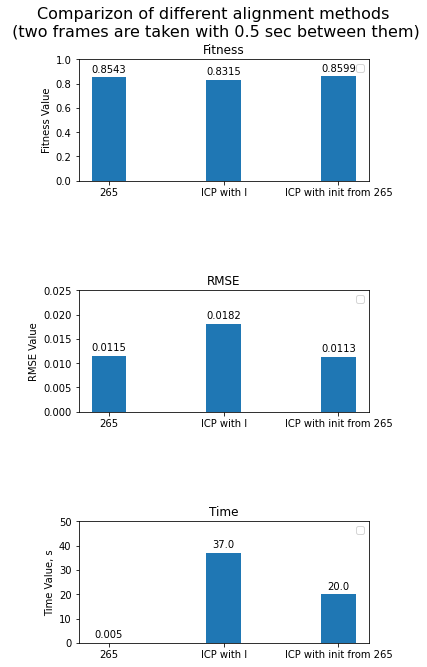

In [32]:
fitness_list =  [evaluation_init.fitness, T.fitness, T_init.fitness ]
rmse_list =  [evaluation_init.inlier_rmse, T.inlier_rmse, T_init.inlier_rmse ]
time_list =  [0.005, 37, 20 ]
labels =  [ '265', 'ICP with I', 'ICP with init from 265']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, (ax0, ax, ax2) = plt.subplots(3,1)
fig.suptitle('Comparizon of different alignment methods\n (two frames are taken with 0.5 sec between them)\n ', fontsize=16)
rects0 = ax0.bar(x, fitness_list, width)
rects1 = ax.bar(x, rmse_list, width)
rects2 = ax2.bar(x, time_list, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel('Fitness Value')
ax0.set_title('Fitness')
ax0.set_xticks(x)
ax0.set_xticklabels(labels)
ax0.legend()
ax0.set_ylim([0,1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0,0.025])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Time Value, s')
ax2.set_title('Time')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.set_ylim([0,50])

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0, ax0)
autolabel(rects1, ax)
autolabel(rects2, ax2)

fig.tight_layout()
fig.set_size_inches(5, 10)

plt.show()

In [120]:
import pyrealsense2 as rs
import cv2
import numpy as np
import time
from IPython.display import clear_output
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

In [156]:
def plot_pose(frames=[], poses=[], show_t=True, show_coord=True, show_pose=True, t_names=['$\mathbf{t}$']):
    """Plotting poses in frames

    Args:
        frames (list): frames to plot in addition to original frame.
        poses (list): poses to plot in the original frame.
        
        show_t (bool): depict t-vector name
        show_coord (bool): depict pose coordinates

    Returns:
        None.
    """
    def get_xyzuvctt(T):
        t = T[:3, 3:4].flatten(); t_ = t/(np.linalg.norm(t)+1e-5)*5
        R = T[:3,:3]
        (x, y, z), (u, v, c) = np.repeat(t.reshape(3,1),3, axis=1), R
        return x, y, z, u, v, c, t, t_
 
    
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    lngth = 3

    # fig appearance
    ax.view_init(elev=22, azim=32)
#     ax.set_aspect('equal')
    ax.view_init(elev=22, azim=20)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('off'); #ax.axis('equal')
    
    
    #origin and coordinate axes (coordinate frame)
    xl = 'x'; yl = 'y'; zl = 'z'; ol = 'O'
    x, y, z, u, v, c, t, t_ = get_xyzuvctt(np.eye(4))
        
    ax.scatter(t_[0], t_[1], t_[2], s=80, c='k')
    ax.quiver(x, y, z, u, v, c, color='k', length=lngth, arrow_length_ratio=0.2, linewidth=0.5)
    ax.text(0,-0.5,-0.1,ol); 
    ax.text(lngth*1.2,0,0,xl); ax.text(0,lngth*1.2,0,yl); ax.text(0,0,lngth*1.2,zl)
    # aid to have initial minimum dimensions of plot
    ax.scatter(4,4,4, alpha=0)
    
    for frame in frames:
        x, y, z, u, v, c, t, t_ = get_xyzuvctt(frame)
        ax.scatter(t_[0], t_[1], t_[2], s=80, c='k')
        ax.quiver(
            x, y, z, u, v, c, color='k', length=lngth, arrow_length_ratio=0.2, linewidth=0.5)
        xl += '\''; yl += '\''; zl += '\''; ol += '\''
        ax.text(t_[0],t_[1]-0.5,t_[2]-0.1,ol); 
        frame = frame @ np.diag([lngth*1.2, lngth*1.2, lngth*1.2, 1])
        ax.text(frame[:3,:3][0][0]+t_[0],frame[:3,:3][1][0]+t_[1], frame[:3,:3][2][0]+t_[2],xl);
        ax.text(frame[:3,:3][0][1]+t_[0],frame[:3,:3][1][1]+t_[1], frame[:3,:3][2][1]+t_[2],yl);
        ax.text(frame[:3,:3][0][2]+t_[0],frame[:3,:3][1][2]+t_[1], frame[:3,:3][2][2]+t_[2],zl);
    
    prev_t = [0, 0, 0]
    for i, pose in enumerate(poses):
        # given frame
        x, y, z, u, v, c, t, t_ = get_xyzuvctt(pose)
        ax.plot([prev_t[0], t[0]], [prev_t[1], t[1]], [prev_t[2], t[2]], color='k', linewidth=2)
        prev_t = t
  
    if show_pose:
            ax.quiver(x, y, z, u, v, c, arrow_length_ratio=0, color=['r','g','b'], linestyle='-', linewidth=4)
    if show_coord:
            ax.text(t[0], t[1], t[2]-0.7, '('+str(t[0])+','+str(t[1])+','+str(t[2])+')')
    
    plt.show()

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

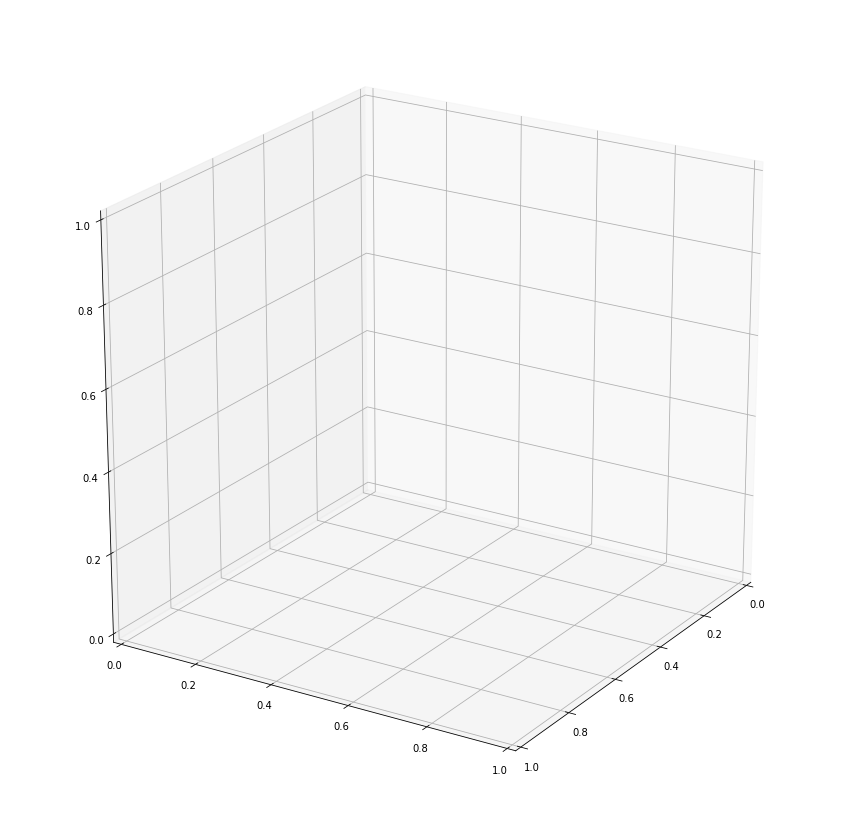

In [157]:
tm = np.eye(4)
transformation_matrix_set = []
transformation_matrix_set.append(tm)

for _ in range(20):
    tm[0,-1]+=0.2 #X
    tm[1,-1]+=0.5 #Y
#     tm[2,-1]+=0.5 #Z
    transformation_matrix_set.append(tm)
    plot_pose(poses=transformation_matrix_set)
    time.sleep(0.01)
    clear_output(wait=True)
plt.show()

In [ ]:
# rewind
for i in range(frames_between_frames_D435*count_of_frames*2):
    pipe_d435.wait_for_frames()

In [ ]:
d435_frames = []
while len(d435_frames) != count_of_frames:
    for i in range(frames_between_frames_D435):
        depth_frame = pipe_d435.wait_for_frames().get_depth_frame()
    d435_frames.append(depth_frame)

In [ ]:
pose_frame = None
pose_frame_time = -1
thresh = 7
t265_frames = []
t265_frames_temp = []
n = 0

for i, depth_frame in enumerate(d435_frames):
    depth_frame_time = depth_frame.get_timestamp()
    while abs(depth_frame_time-pose_frame_time) > thresh:
        pose_frame = pipe_t265.wait_for_frames().get_pose_frame()
        pose_frame_time = pose_frame.get_timestamp()
    while abs(depth_frame_time-pose_frame_time) <= thresh:
        pose_frame = pipe_t265.wait_for_frames().get_pose_frame()
        t265_frames_temp.append(pose_frame)
        pose_frame_time = pose_frame.get_timestamp()

    min_int_index = 0
    min_interval = thresh * 2
    for ind_pose, temp_pose in enumerate(t265_frames_temp):
        if abs(depth_frame_time-temp_pose.get_timestamp())<min_interval:
            min_interval = abs(depth_frame_time-temp_pose.get_timestamp())
            min_int_index = ind_pose
    t265_frames.append(t265_frames_temp[min_int_index])
    

## Test for frames

In [ ]:
def count_diff_frames(frames):
    prev_frame = None
    for i, frame in enumerate(frames):
        if prev_frame is not None:
            print("Difference bw {0} and {1} frames is {2:.4f} ms".format(i, i-1, frame.get_timestamp()-prev_frame.get_timestamp()))
        prev_frame = frame

In [ ]:
def get_diff_sensors(frames1, frames2):
    if len(frames1) != len(frames2):
        return
    else:
        for i in range(len(frames1)):
            print("Difference bw frames1[{0}] and frames2[{0}] frames is {1:.4f} ms".format(i, frames1[i].get_timestamp()-frames2[i].get_timestamp()))
        

In [ ]:
count_diff_frames(d435_frames)
count_diff_frames(t265_frames)

In [ ]:
get_diff_sensors(d435_frames, t265_frames)

# Analysis

## Helpers

In [ ]:
import time
from functools import wraps

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        time_start = time.time()
        result = f(*args, **kw)
        time_end = time.time()
        print('----------func:%r took: %2.4f sec' % (f.__name__, time_end-time_start))
        return result
    return wrap

In [ ]:
tm_T265toD435 = np.array([[0.999968402, -0.006753626, -0.004188075, -0.015890727],
                          [-0.006685408, -0.999848172, 0.016093893, 0.028273059],
                          [-0.004296131, -0.016065384, -0.999861654, -0.009375589],
                          [0, 0, 0, 1]])

In [ ]:
# Graph plot
t265 = np.load('../logs/points_trajectory_T265.npy') #np array coords
d435 = np.load('../logs/points_trajectory_D435.npy')/1 # np array coords
# before = 10
before = d435.shape[0]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(t265[:before, 0], t265[:before, 1], t265[:before, 2], label='t265')
ax.plot(d435[:before, 0], d435[:before, 1], d435[:before, 2], label='d435')
ax.view_init(elev=22, azim=80)
plt.legend()

## Functions

In [ ]:
def get_transformation(pose):
    data = pose.get_pose_data()
    data_rot = [float(i.strip('xyzw: ')) for i in str(data.rotation).split(', ')]
    r = R.from_quat(data_rot)
    rotation = np.array(r.as_matrix())
    translation = np.array([float(i.strip('xyzw: ')) for i in str(data.translation).split(', ')])[np.newaxis].T
    T = np.hstack((rotation, translation))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

In [ ]:
get_transformation(t265_frames[0])

In [ ]:
def apply_transformation(transformation, points):
    """

    :param transformation: 4x4 np.array
    :param points: Nx3 np.array
    :return: transformed Nx3 np.array
    """
    if transformation is None or points is None:
        return None
    else:
        coordinates = np.hstack((points, np.ones((points.shape[0], 1))))
        return (transformation @ coordinates.T).T[:, :-1]

In [ ]:
def get_coordinates(depth_frame, make_sampling=True, koef = 2**2):
    """
     TODO
    :param make_sampling:
    :return:
    """
    pc = rs.pointcloud()
    if make_sampling:
        decimate = rs.decimation_filter()
        decimate.set_option(rs.option.filter_magnitude, koef)
        depth_frame = decimate.process(depth_frame)

        points = pc.calculate(depth_frame).as_points()
    else:
        points = pc.calculate(depth_frame).as_points()

    coordinates = np.ndarray(buffer=points.get_vertices(), dtype=np.float32, shape=(points.size(), 3))
    coordinates = coordinates[coordinates[:, 2] != 0]

    coordinates = apply_transformation(tm_T265toD435, coordinates)
    return coordinates


In [ ]:
get_coordinates(d435_frames[0]).shape

In [ ]:
def convert_to_pcl(points):
    """
        TODO
    :param points: Nx3
    :return:
    """
    if points is None:
        return None
    else:
        return o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))

In [ ]:
convert_to_pcl(get_coordinates(d435_frames[0]))

In [ ]:
# TODO this 100%

def get_transformation(self, max_point_pair_dist=0.2, init_guess=np.eye(4)):
    old_point_cloud = self.apply_transformation(self.prev_tm, self.point_cloud)
    old_pcl = self.convert_to_pcl(old_point_cloud) # n-1
    self.point_cloud = self.apply_transformation(self.prev_tm, self.get_coordinates())
    if old_pcl is None:
        self.prev_tm = init_guess
        print("\n\n\n{}\n\n\n".format(init_guess))
        return None

    new_pcl = self.convert_to_pcl(self.point_cloud) # n

    tr_mx = o3d.registration.registration_icp(old_pcl, new_pcl, max_point_pair_dist,
                                              self.prev_tm, o3d.registration.TransformationEstimationPointToPoint())\
        .transformation
    self.prev_tm = tr_mx
    return tr_mx